<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: Random Forest
Hyperparam:
*   Tiefe der Bäume: [1, 2, 4, 8, 16, 32]
*   Anzahl der Bäume: [1, 2, 4, 8, 16, 32]
*   Bagging: [Yes,No]
*   Random split selection: [Yes, No]
*   Criterion: [gini, entropy]


In [1]:
!pip install sklearn
random_state = 1

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_diabetes

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dataset = load_iris()
#dataset = load_diabetes()

X = dataset.data
y = dataset.target

stratKFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)

forest = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':[1,2,4,8,16,32], 'n_estimators':[1,2,4,8,16,32], 'bootstrap':[True,False], 'max_features': ['sqrt','log2'], 'criterion':['gini','entropy']}

gscv = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=stratKFold)
gscv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8, 16, 32],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 4, 8, 16, 32]})

In [3]:
import time


cpus = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
deltas = []
for cpu in cpus:
    start = time.time_ns()
    gscv = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=cpu, cv=stratKFold)
    gscv.fit(X, y)
    end = time.time_ns()
    delta = end-start
    deltas.append(delta)
    print(delta)
    
print(deltas)

8755107700
5309842000
3631365500
3011834500
2634548200
2406143600
2223425900
1296954900
1315504900
1242840400
2289785900
1265999200
1290511100
1284999000
1320999100
1208256400
1273246700
1169999200
1196005500
1212998700
[8755107700, 5309842000, 3631365500, 3011834500, 2634548200, 2406143600, 2223425900, 1296954900, 1315504900, 1242840400, 2289785900, 1265999200, 1290511100, 1284999000, 1320999100, 1208256400, 1273246700, 1169999200, 1196005500, 1212998700]


In [4]:
print(gscv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=8, random_state=1)


max_depth


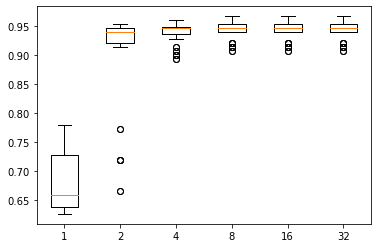

n_estimators


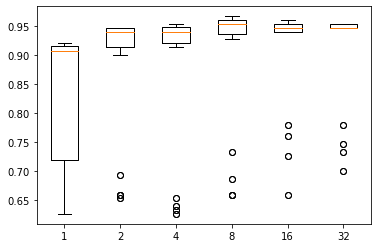

bootstrap


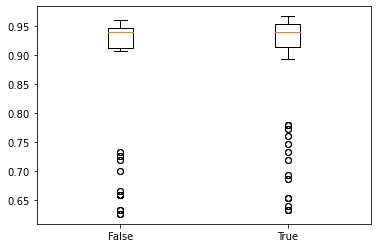

max_features


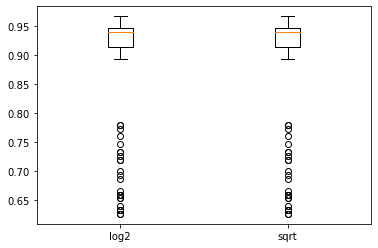

criterion


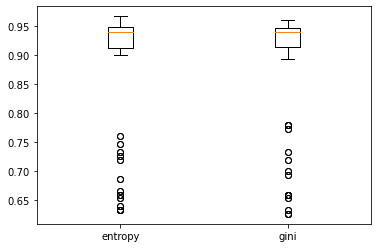

In [5]:
from pandas.core.groupby.groupby import GroupBy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = pd.DataFrame(gscv.cv_results_['params'])
scores = pd.DataFrame(gscv.cv_results_['mean_test_score']).rename(columns={0: 'score'})
dataframe = params.join(scores)
for key in parameters.keys():
  print(key)
  groups = dataframe.groupby([key])
  param_list=[]
  score_list=[]
  #extract data
  for param in groups.groups.keys():
    df=dataframe.iloc[groups.groups[param]]

    scores=np.asarray(df['score'])
    param_list.append(param)
    score_list.append(scores)

  ###plot
  plt.boxplot(score_list,labels=param_list)
  plt.show()

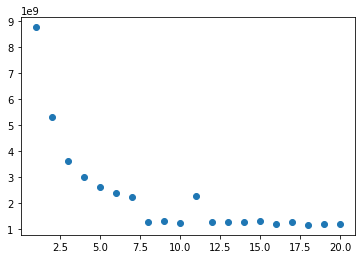

In [7]:
plt.scatter(cpus,y=deltas)